In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import statsmodels.api as smf
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

Question-1)
Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [ ]:
#data loading
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
su50=pd.read_csv('50_Startups.csv')
su50.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Basic and EDA

In [ ]:
#renaming columns
su50.rename(columns={'R&D Spend':'rd_spend','Administration':'administration','Marketing Spend':'market_spend','State':'state','Profit':'profit'},inplace=True)
su50.columns

Index(['rd_spend', 'administration', 'market_spend', 'state', 'profit'], dtype='object')

In [ ]:
su50.describe()

,rd_spend,administration,market_spend,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
su50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rd_spend        50 non-null     float64
 1   administration  50 non-null     float64
 2   market_spend    50 non-null     float64
 3   state           50 non-null     object 
 4   profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
su50.isna().sum()

rd_spend          0
administration    0
market_spend      0
state             0
profit            0
dtype: int64

In [ ]:
su50.duplicated().value_counts()

False    50
dtype: int64

Visualising datapoints

<Axes: >

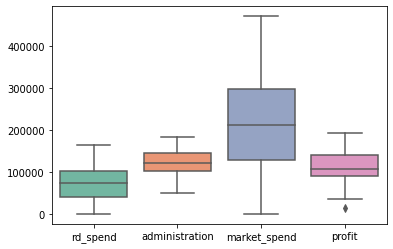

In [ ]:
#plotting boxplot to observe datapoints nature
sns.boxplot(data=su50, orient="v",palette="Set2")

There are outliers in profit, anyway it is our dependent variable that we are going to predict.There are outliers in remaining features

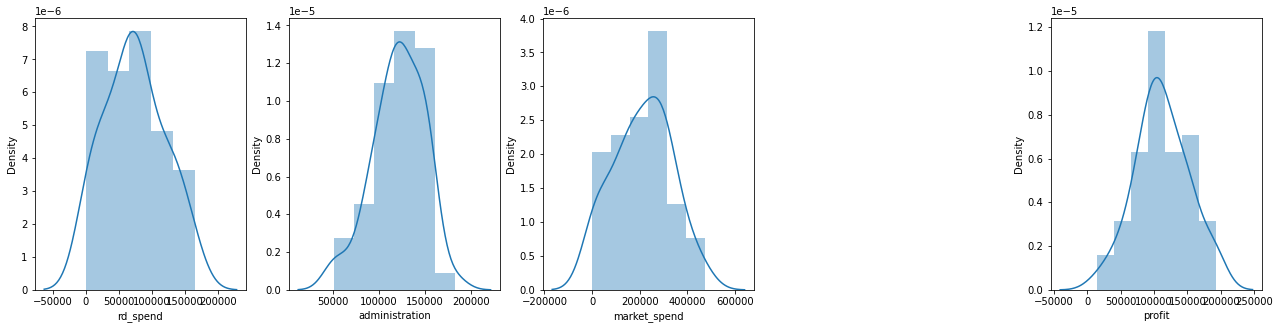

In [ ]:
#plotting distplots to observe datapoints nature
plt.figure(figsize=(22,5))
for i, column in enumerate(su50.columns, 1):
    if i == 4:
      continue
    plt.subplot(1,5,i)
    sns.distplot(su50[column]) 

All are normally distributed(approx)

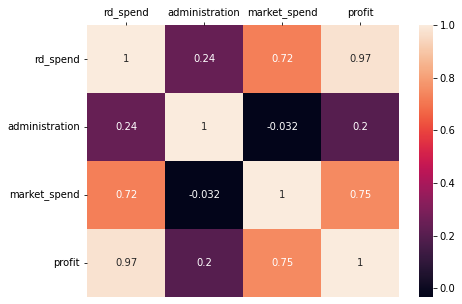

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(7,5))
ax=sns.heatmap(su50.corr(), annot=True)
ax.xaxis.tick_top()

Spend features are having greater correlation with profit.

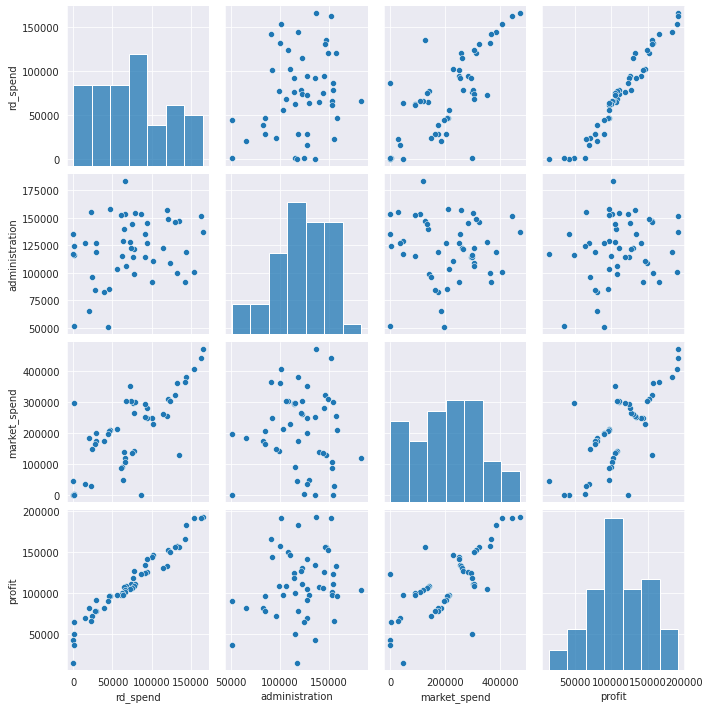

In [ ]:
#pairplot
sns.set_style(style='darkgrid')
sns.pairplot(su50)

Modelling 

In [ ]:
#model 1 vs all
import statsmodels.formula.api as smf
su50_model1 = smf.ols('profit~rd_spend+administration+market_spend',data=su50).fit()

In [ ]:
su50_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        13:08:52   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd_spend           0.8057      0.045     17.846      0.000       0.715       0.897
administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
market_spend       0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

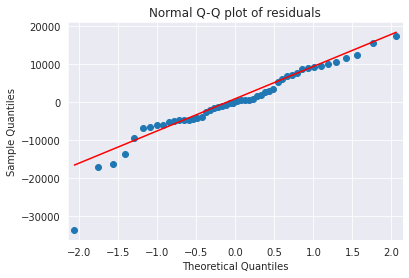

In [ ]:
import statsmodels.api as sm 
qqplot1=sm.qqplot(su50_model1.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

Text(0, 0.5, 'Standardized residual values')

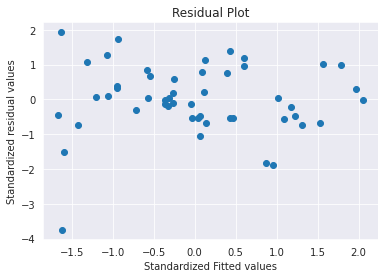

In [ ]:
def get_standradized_values( vals ):
  return (vals - vals.mean())/vals.std()
plt.scatter(get_standradized_values(su50_model1.fittedvalues),
            get_standradized_values(su50_model1.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

Residual vs Regressors- su50_model

eval_env: 1


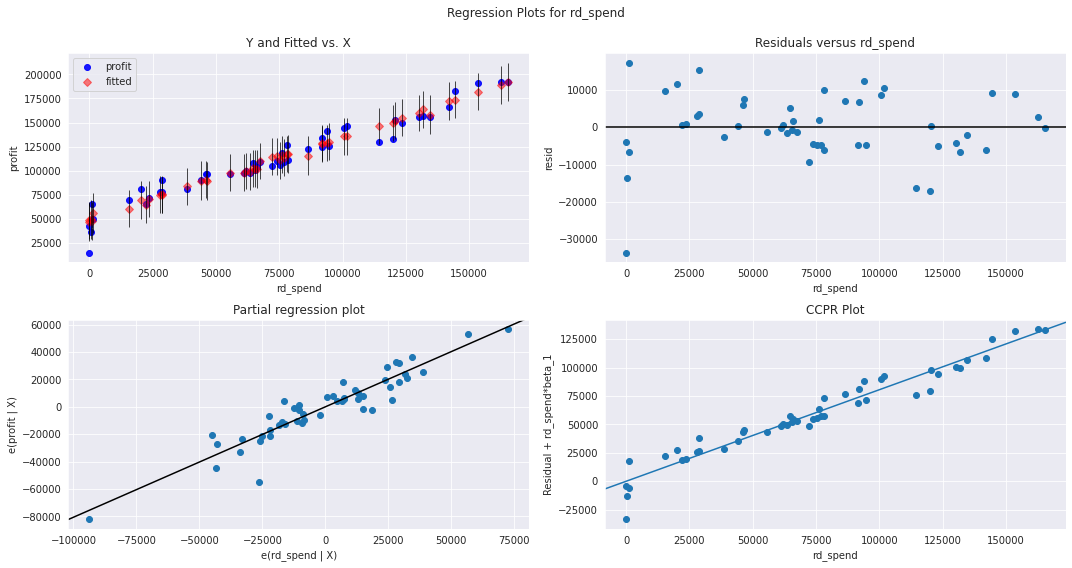

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(su50_model1, "rd_spend",fig=fig)
plt.show();

eval_env: 1


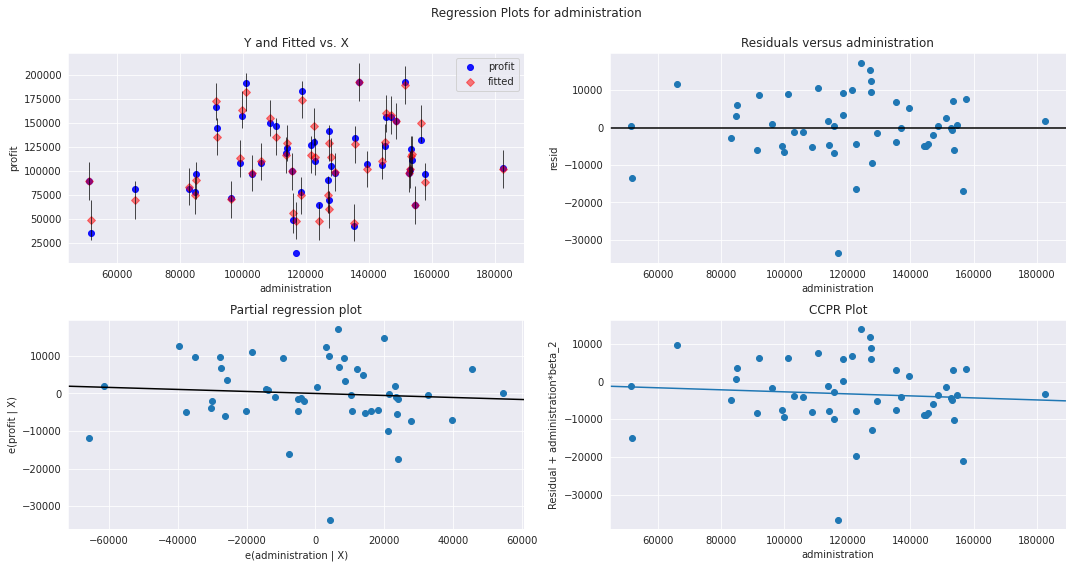

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(su50_model1, "administration",fig=fig)
plt.show()

eval_env: 1


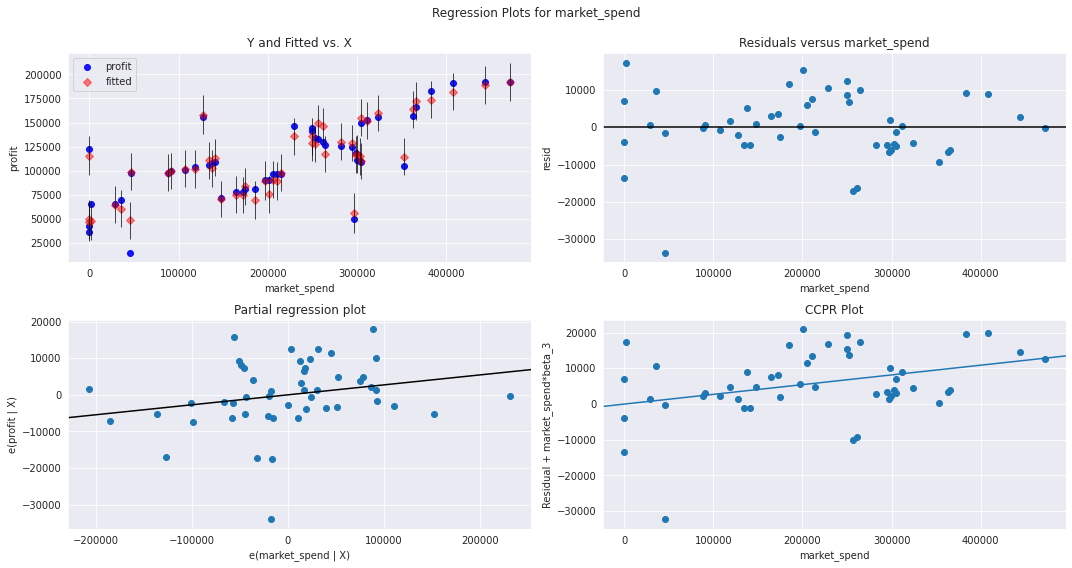

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(su50_model1, "market_spend",fig=fig)
plt.show()

Linear Regression models

In [ ]:
su50_model2 = smf.ols('profit~rd_spend',data=su50).fit()
su50_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.50e-32
Time:                        13:08:56   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rd_spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

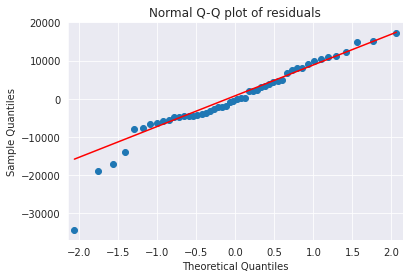

In [ ]:
import statsmodels.api as sm 
qqplot2=sm.qqplot(su50_model2.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

Text(0, 0.5, 'Standardized residual values')

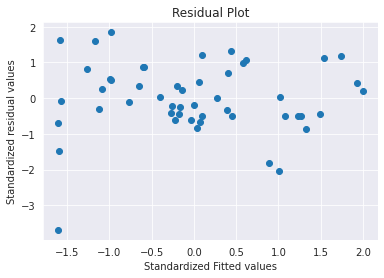

In [ ]:
def get_standradized_values( vals ):
  return (vals - vals.mean())/vals.std()
plt.scatter(get_standradized_values(su50_model2.fittedvalues),
            get_standradized_values(su50_model2.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
su50_model3 = smf.ols('profit~rd_spend',data=su50).fit()
su50_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.50e-32
Time:                        13:08:57   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rd_spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

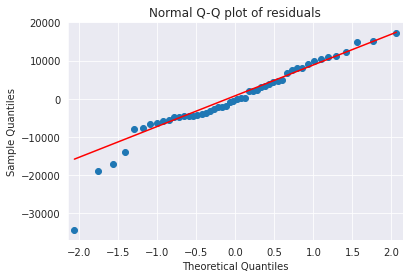

In [ ]:
import statsmodels.api as sm 
qqplot3=sm.qqplot(su50_model3.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

Text(0, 0.5, 'Standardized residual values')

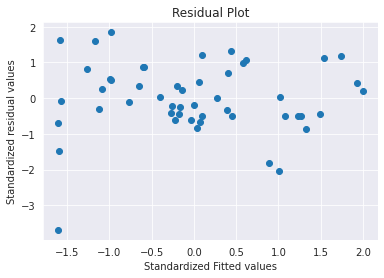

In [ ]:
def get_standradized_values( vals ):
  return (vals - vals.mean())/vals.std()
plt.scatter(get_standradized_values(su50_model3.fittedvalues),
            get_standradized_values(su50_model3.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
su50_model4 = smf.ols('profit~rd_spend',data=su50).fit()
su50_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.50e-32
Time:                        13:08:58   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rd_spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

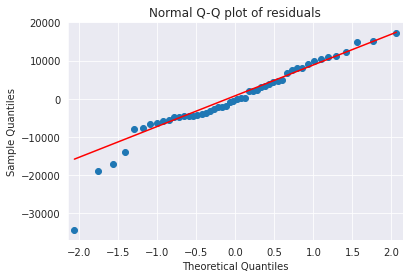

In [ ]:
import statsmodels.api as sm 
qqplot4=sm.qqplot(su50_model4.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

Text(0, 0.5, 'Standardized residual values')

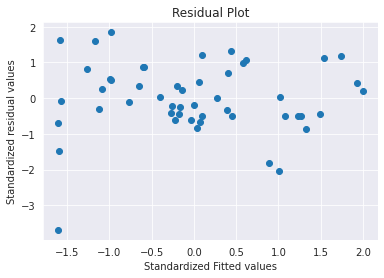

In [ ]:
def get_standradized_values( vals ):
  return (vals - vals.mean())/vals.std()
plt.scatter(get_standradized_values(su50_model4.fittedvalues),
            get_standradized_values(su50_model4.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
su50_model5 = smf.ols('profit~rd_spend',data=su50).fit()
su50_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.50e-32
Time:                        13:08:59   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rd_spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

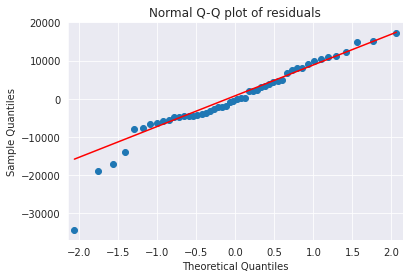

In [ ]:
import statsmodels.api as sm 
qqplot5=sm.qqplot(su50_model5.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

Text(0, 0.5, 'Standardized residual values')

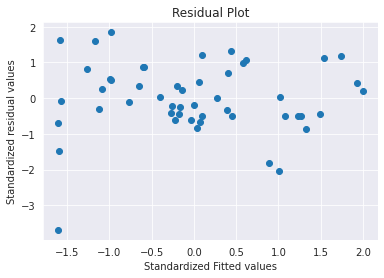

In [ ]:
def get_standradized_values( vals ):
  return (vals - vals.mean())/vals.std()
plt.scatter(get_standradized_values(su50_model5.fittedvalues),
            get_standradized_values(su50_model5.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

Resudue vs Regressors su50_model5

eval_env: 1


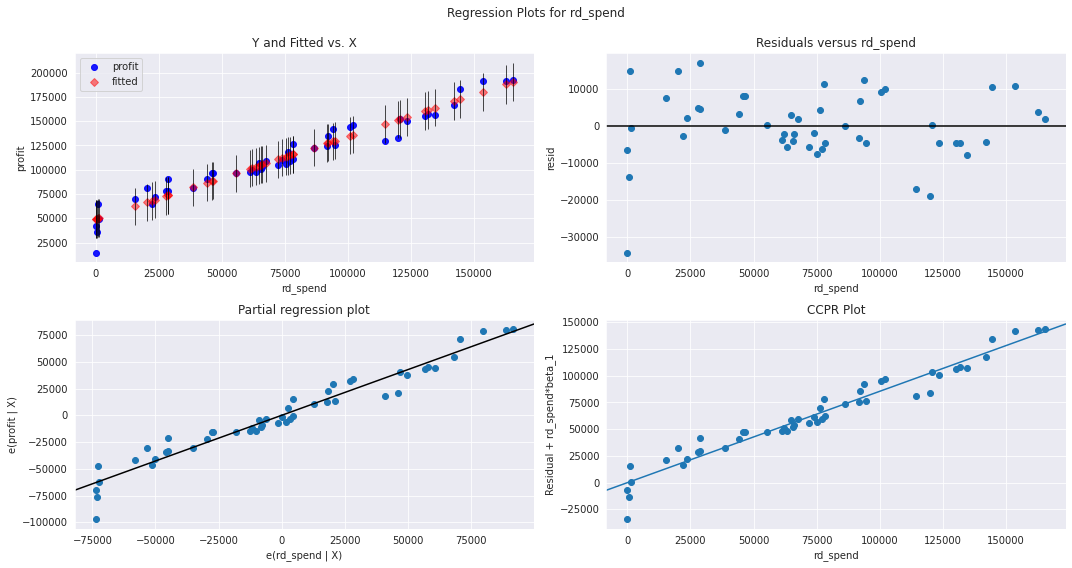

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(su50_model4,"rd_spend", fig=fig)
plt.show()

eval_env: 1


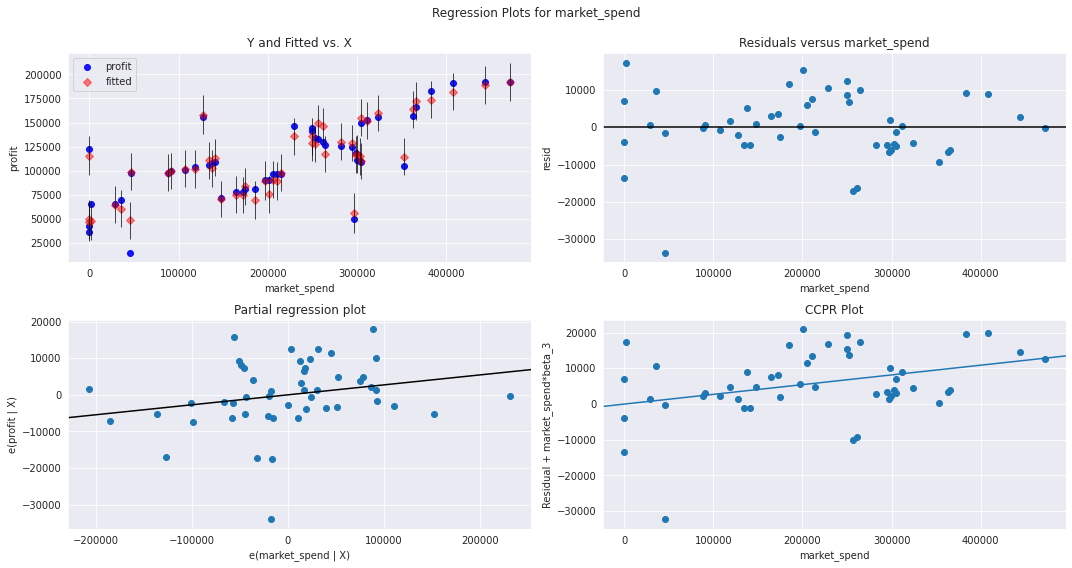

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(su50_model1,"market_spend", fig=fig)
plt.show()

Variance Inflation Factor

In [ ]:
su50.columns

Index(['rd_spend', 'administration', 'market_spend', 'state', 'profit'], dtype='object')

In [ ]:

aic_rd_spend=smf.ols('rd_spend~market_spend+administration',data=su50).fit().aic
rsq_rd_spend = smf.ols('rd_spend~market_spend+administration',data=su50).fit().rsquared  
vif_rd_spend = 1/(1-rsq_rd_spend)

aic_administration=smf.ols('administration~market_spend+rd_spend',data=su50).fit().aic
rsq_administration = smf.ols('administration~market_spend+rd_spend',data=su50).fit().rsquared  
vif_administration = 1/(1-rsq_administration) 

aic_market_spend=smf.ols('market_spend~rd_spend+administration',data=su50).fit().aic
rsq_market_spend = smf.ols('market_spend~rd_spend+administration',data=su50).fit().rsquared  
vif_market_spend = 1/(1-rsq_market_spend) 


# Storing vif values in a data frame
df = {'Variables':['rd_spend','administration','market_spend'],
      'VIF':[vif_rd_spend,vif_administration,vif_market_spend],
      'aic':[aic_rd_spend,aic_administration,aic_market_spend],
      'r_sqr':[rsq_rd_spend,rsq_administration,rsq_market_spend]}
Vif_tab = pd.DataFrame(df)  
Vif_tab

,Variables,VIF,aic,r_sqr
0,rd_spend,2.468903,1175.121976,0.594962
1,administration,1.175091,1162.875978,0.149002
2,market_spend,2.326773,1276.074905,0.570220


In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = su50_model1.get_influence()
(c, _) = model_influence.cooks_distance

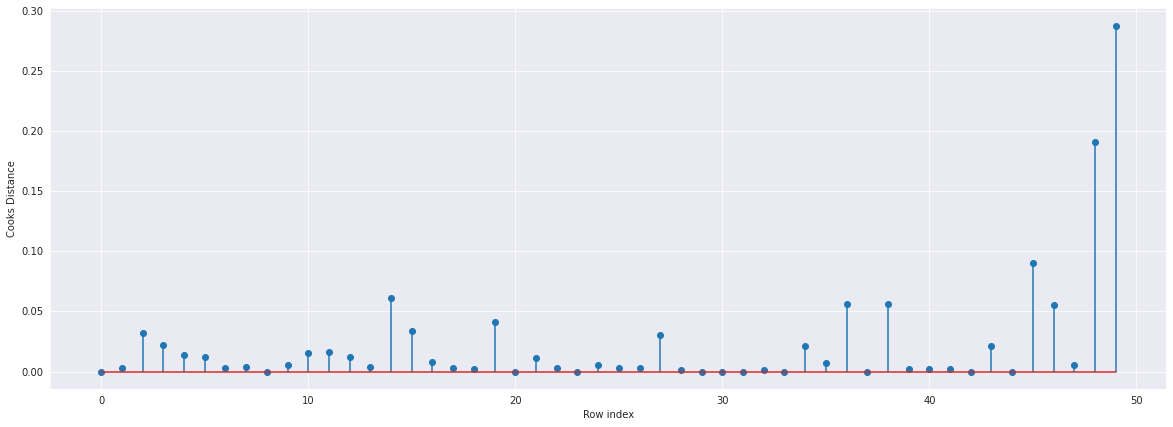

In [ ]:
#plot the influencers value using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(su50)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [ ]:
k,n=su50.shape 
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
     


30.599999999999998

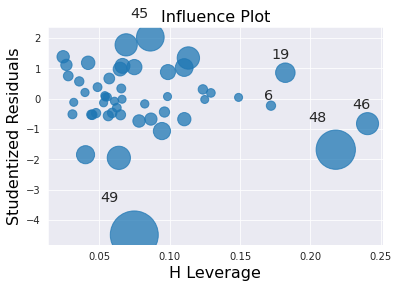

In [ ]:

#from seaborn.regression import statsmodels
#from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import statsmodels.api as sm

#influence_plot(model1,alhpa=0.5)
sm.graphics.influence_plot(su50_model1)
plt.show()

In [ ]:
su50[su50.index.isin([48,46,49])]

,rd_spend,administration,market_spend,state,profit
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
su50_1=su50.drop(su50.index[[48,46,49]],axis=0).reset_index()
su50_1=su50_1.drop('index',axis=1)
su50_1

,rd_spend,administration,market_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Final model

In [ ]:
su50_1_model = smf.ols('profit~rd_spend+market_spend',data=su50_1).fit()
su50_1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.65e-31
Time:                        13:48:08   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
rd_spend         0.7439      0.037     19.902      0.000       0.669       0.819
market_spend     0.0323      0.014      2.376      0.022       0.005       0.060
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
(su50_1_model.rsquared,su50_1_model.aic)

(0.9601156240945742, 972.8030903954614)

In [ ]:
model_influence_x = su50_1_model.get_influence()
(c1,_)= model_influence_x.cooks_distance

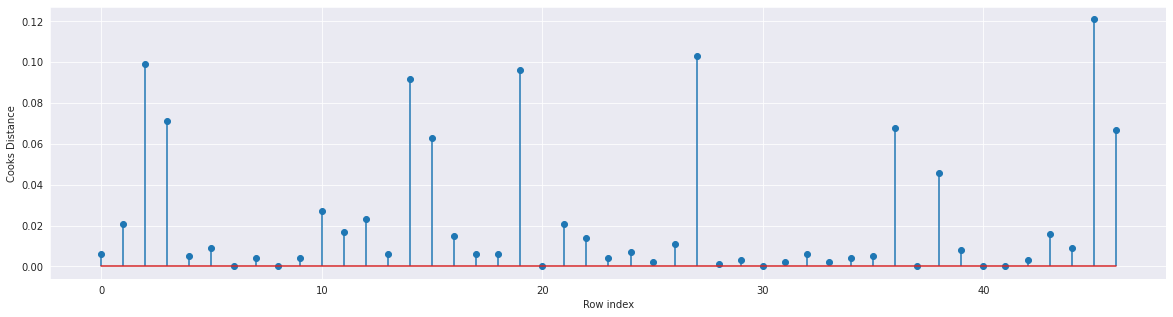

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 5))
plt.stem(np.arange(len(su50_1)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c1),np.max(c1))

(45, 0.12080904032647966)

In [ ]:
#new data for prediction
predict_data=pd.DataFrame({'rd_spend':100000,'market_spend':250000},index=[1])
predict_data

,rd_spend,market_spend
1,100000,250000


In [ ]:
su50_1_model.predict(predict_data)

1    134173.457814
dtype: float64

In [ ]:
predicted_values = su50_1_model.predict(su50_1)
su50_1['predicted_profits'] = pd.Series(predicted_values)
su50_1

,rd_spend,administration,market_spend,state,profit,predicted_profits
0,165349.20,136897.80,471784.10,New York,192261.83,189947.201324
1,162597.70,151377.59,443898.53,California,191792.06,186999.822978
2,153441.51,101145.55,407934.54,Florida,191050.39,179027.346980
3,144372.41,118671.85,383199.62,New York,182901.99,171482.332145
4,142107.34,91391.77,366168.42,Florida,166187.94,169247.365053
5,131876.90,99814.71,362861.36,New York,156991.12,161530.559248
6,134615.46,147198.87,127716.82,California,156122.51,155972.916982
7,130298.13,145530.06,323876.68,Florida,155752.60,159097.044290
8,120542.52,148718.95,311613.29,New York,152211.77,151444.171338
9,123334.88,108679.17,304981.62,California,149759.96,153307.099523


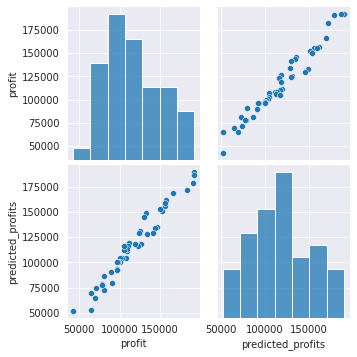

In [ ]:
sns.pairplot(su50_1[['profit','predicted_profits']])

In [ ]:
su50_1_model.rsquared,su50_1_model.rsquared_adj

(0.9601156240945742, 0.9583026979170548)

Conclusion

In [ ]:
# comparing above models
test_data={'Model':pd.Series(['all linearModel Transformation','rd_spend','market_spend',
                              'rd_spend+market_spend','rd_spend+administration','After Removing influceing points']),
     'R Squared':pd.Series([su50_model1.rsquared,su50_model2.rsquared,su50_model3.rsquared,
                            su50_model4.rsquared,su50_model1.rsquared,su50_1_model.rsquared]),
     'adjR Squared':pd.Series([su50_model1.rsquared_adj,su50_model2.rsquared_adj,su50_model3.rsquared_adj,
                            su50_model4.rsquared_adj,su50_model1.rsquared_adj,su50_1_model.rsquared_adj])}
     
test_table=pd.DataFrame(test_data)
test_table
     


,Model,R Squared,adjR Squared
0,all linearModel Transformation,0.950746,0.947534
1,rd_spend,0.946535,0.945421
2,market_spend,0.946535,0.945421
3,rd_spend+market_spend,0.946535,0.945421
4,rd_spend+administration,0.950746,0.947534
5,After Removing influceing points,0.960116,0.958303


The final model giving the best accuracy among all for predicting profit. i.e 96%